In [587]:
import pandas as pd

In [588]:
df = pd.read_excel('../Datos/DB_ML_Productos.xlsx')

In [589]:
df.head()

,Cant_Vendidos,Descripcion,Calificacion,Precio_1,Precio_2,Vendedor_1,Reputacion_Vendedor,Calificaciones,Cant_Comentarios,Url_Producto
0,1000,Pantuflas Sandalias Chanclas Ligeras Ortopédic...,4.1,19999,49999,BOUN,MercadoLíder Platinum,996,355,https://articulo.mercadolibre.com.co/MCO-93366...
1,1000,Zapatos Acuaticos Agua Playa Hombre Mujer Pisc...,4.8,136500,0,SERGIOJIME,MercadoLíder Platinum,439,198,https://articulo.mercadolibre.com.co/MCO-86525...
2,1000,Zapato Playa Aqua Shoe Deportes Extremo Acuáticos,4.7,114399,129999,LOGISTICS SOLUTIONS,MercadoLíder,319,155,https://articulo.mercadolibre.com.co/MCO-56237...
3,1000,"Garras Colores Adulto Negra, Cafe, Gris",4.8,36900,0,JMBABUCHAS,Sin reputacion,296,154,https://articulo.mercadolibre.com.co/MCO-56866...
4,1000,Sandalias Chanclas Acolchadas Antideslizantes ...,4.6,19499,64999,BOUN,MercadoLíder Platinum,389,126,https://articulo.mercadolibre.com.co/MCO-93284...


### Analsis explratorios (EDA). Productos

### Descripcion general del dataset

In [590]:
# 1. Dimensiones del DataFrame
df.shape

(2726, 10)

In [591]:
# 2. Tipos de datos por columna
# Descripcion general de los datos
df.info()

# - la columna Cant_vendidos se muestra como objeto, pero deberia ser numerica para entender un poco la distribucion de venta.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cant_Vendidos        2726 non-null   object 
 1   Descripcion          2726 non-null   object 
 2   Calificacion         2726 non-null   float64
 3   Precio_1             2726 non-null   int64  
 4   Precio_2             2726 non-null   int64  
 5   Vendedor_1           2726 non-null   object 
 6   Reputacion_Vendedor  2726 non-null   object 
 7   Calificaciones       2726 non-null   int64  
 8   Cant_Comentarios     2726 non-null   int64  
 9   Url_Producto         2726 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 213.1+ KB


In [592]:
df['Cant_Vendidos'].value_counts()

Cant_Vendidos
Nuevo    885
5        518
1        477
2        205
3        138
100      134
25       126
50       104
4        103
500       19
1000      17
Name: count, dtype: int64

In [593]:
# remplazar en la columna Cant_Vendidos la palabra 'Nuevo' por 0 y convertir la columna a numerica
df['Cant_Vendidos'] = df['Cant_Vendidos'].replace('Nuevo', 0)
df['Cant_Vendidos'] = pd.to_numeric(df['Cant_Vendidos'], errors='coerce')
df['Cant_Vendidos'].value_counts()

C:\Users\aluca\AppData\Local\Temp\ipykernel_10252\22299225.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Cant_Vendidos
0       885
5       518
1       477
2       205
3       138
100     134
25      126
50      104
4       103
500      19
1000     17
Name: count, dtype: int64

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cant_Vendidos        2726 non-null   int64  
 1   Descripcion          2726 non-null   object 
 2   Calificacion         2726 non-null   float64
 3   Precio_1             2726 non-null   int64  
 4   Precio_2             2726 non-null   int64  
 5   Vendedor_1           2726 non-null   object 
 6   Reputacion_Vendedor  2726 non-null   object 
 7   Calificaciones       2726 non-null   int64  
 8   Cant_Comentarios     2726 non-null   int64  
 9   Url_Producto         2726 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 213.1+ KB


- Poner aca la descripcion general de las columnas.

In [595]:
# 3. Conteo de valores nulos por columna
valores_nulos = df.isnull().sum()
valores_nulos

Cant_Vendidos          0
Descripcion            0
Calificacion           0
Precio_1               0
Precio_2               0
Vendedor_1             0
Reputacion_Vendedor    0
Calificaciones         0
Cant_Comentarios       0
Url_Producto           0
dtype: int64

- No hay valores nullos iniciales en el conjunto de datos. esto despues de la limpieza inicial hecha al Excel

In [596]:
df.head(10)

,Cant_Vendidos,Descripcion,Calificacion,Precio_1,Precio_2,Vendedor_1,Reputacion_Vendedor,Calificaciones,Cant_Comentarios,Url_Producto
0,1000,Pantuflas Sandalias Chanclas Ligeras Ortopédic...,4.1,19999,49999,BOUN,MercadoLíder Platinum,996,355,https://articulo.mercadolibre.com.co/MCO-93366...
1,1000,Zapatos Acuaticos Agua Playa Hombre Mujer Pisc...,4.8,136500,0,SERGIOJIME,MercadoLíder Platinum,439,198,https://articulo.mercadolibre.com.co/MCO-86525...
2,1000,Zapato Playa Aqua Shoe Deportes Extremo Acuáticos,4.7,114399,129999,LOGISTICS SOLUTIONS,MercadoLíder,319,155,https://articulo.mercadolibre.com.co/MCO-56237...
3,1000,"Garras Colores Adulto Negra, Cafe, Gris",4.8,36900,0,JMBABUCHAS,Sin reputacion,296,154,https://articulo.mercadolibre.com.co/MCO-56866...
4,1000,Sandalias Chanclas Acolchadas Antideslizantes ...,4.6,19499,64999,BOUN,MercadoLíder Platinum,389,126,https://articulo.mercadolibre.com.co/MCO-93284...
5,1000,Sandalias Ligeras Ortopédicas Chanclas Ultra C...,4.6,29640,57000,LABODEGA_SURTIDORA,MercadoLíder Platinum,401,122,https://articulo.mercadolibre.com.co/MCO-14499...
6,1000,Babuchas Y Pantuflas Hermosas Para Toda La Fam...,4.8,42000,0,ROCHY 27,Sin reputacion,292,117,https://articulo.mercadolibre.com.co/MCO-58236...
7,1000,Sandalias Chanclas Ortopédicas Tiburón Shark S...,4.6,19499,49999,BOUN,MercadoLíder Platinum,537,113,https://articulo.mercadolibre.com.co/MCO-17698...
8,1000,Zapatos Agua Acuáticos Hombre Mujer Playa Pisc...,4.6,92295,0,SERGIOJIME,MercadoLíder Platinum,268,101,https://articulo.mercadolibre.com.co/MCO-86917...
9,1000,Pantuflas Babuchas Para Dama De Alta Calidad D...,4.6,54000,0,MULTIPLACECOLOMBIACOM,MercadoLíder Gold,289,97,https://articulo.mercadolibre.com.co/MCO-60068...


In [597]:
# 4. Estadísticas descriptivas columnas numéricas
Estd_General = df.describe().round(2)
print(Estd_General)

       Cant_Vendidos  Calificacion    Precio_1    Precio_2  Calificaciones  \
count        2726.00       2726.00     2726.00     2726.00         2726.00   
mean           19.28          1.91    89867.53    29553.34            6.08   
std            90.73          2.34    72175.47    61776.25           32.99   
min             0.00          0.00     9900.00        0.00            0.00   
25%             0.00          0.00    46182.00        0.00            0.00   
50%             2.00          0.00    68500.00        0.00            0.00   
75%             5.00          4.80   115312.00    42900.00            2.00   
max          1000.00          5.00  1132000.00  1009950.00          996.00   

       Cant_Comentarios  
count           2726.00  
mean               2.24  
std               12.19  
min                0.00  
25%                0.00  
50%                0.00  
75%                1.00  
max              355.00  


- En la columna Calificacion lo que indica que hay muchos productos sin valoraciones-ventas aun.
- La variable Cant_Comentarios tiene muchos valores 0 lo que indica que hay muchas publicaciones sin comentarios.

In [598]:
# Mostrar la distribución de valores únicos en 'Cant_Vendidos'
df['Cant_Vendidos'].value_counts().sort_index(ascending=False)

Cant_Vendidos
1000     17
500      19
100     134
50      104
25      126
5       518
4       103
3       138
2       205
1       477
0       885
Name: count, dtype: int64

- Más del 50% de los productos reportan entre 0 y 5 unidades vendidas. Solo un pequeño grupo tiene 100 o más ventas, lo que puede sugerir una concentración de la demanda en pocos productos.

In [599]:
import matplotlib.pyplot as plt
import seaborn as sns

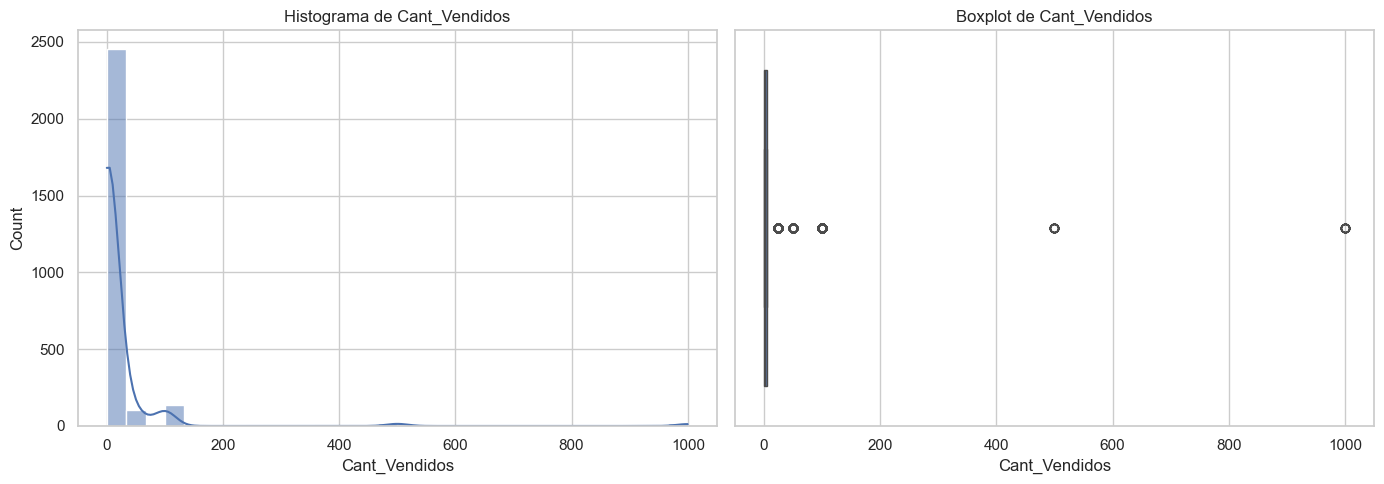

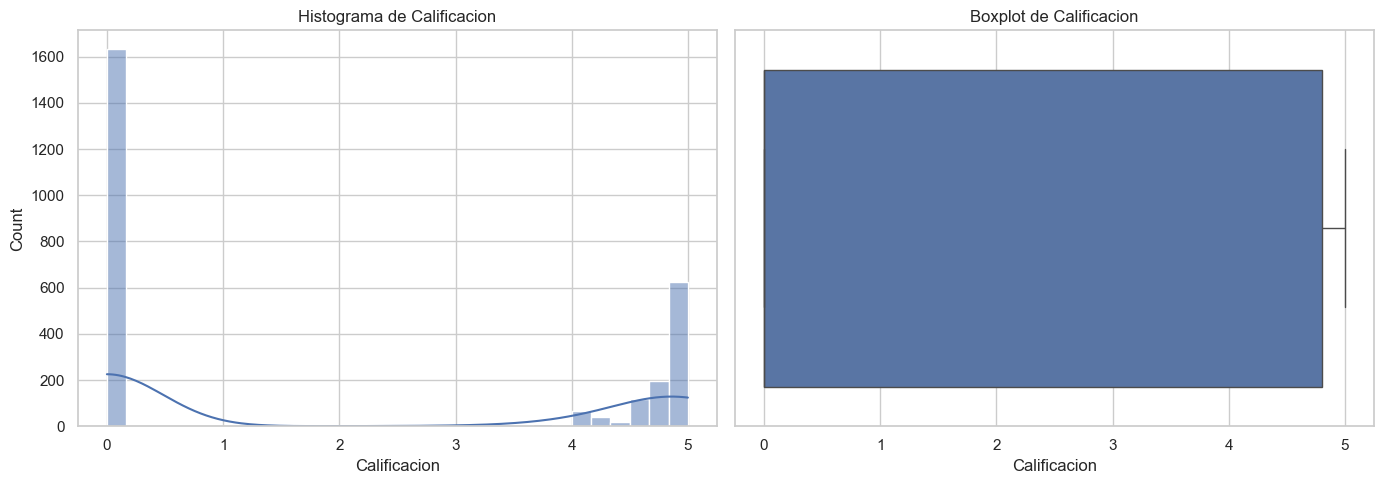

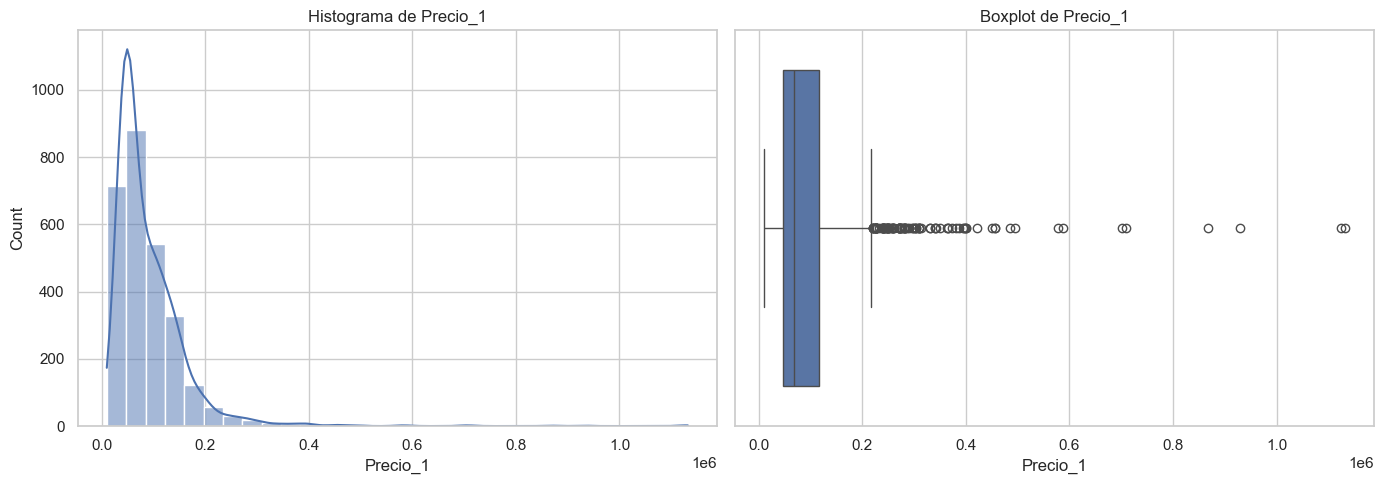

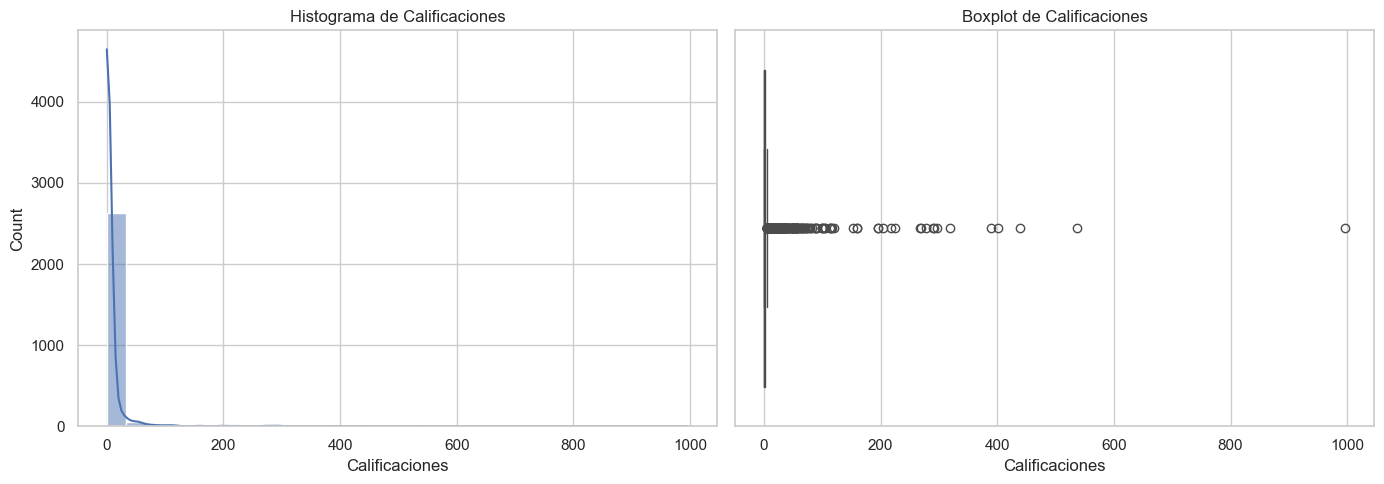

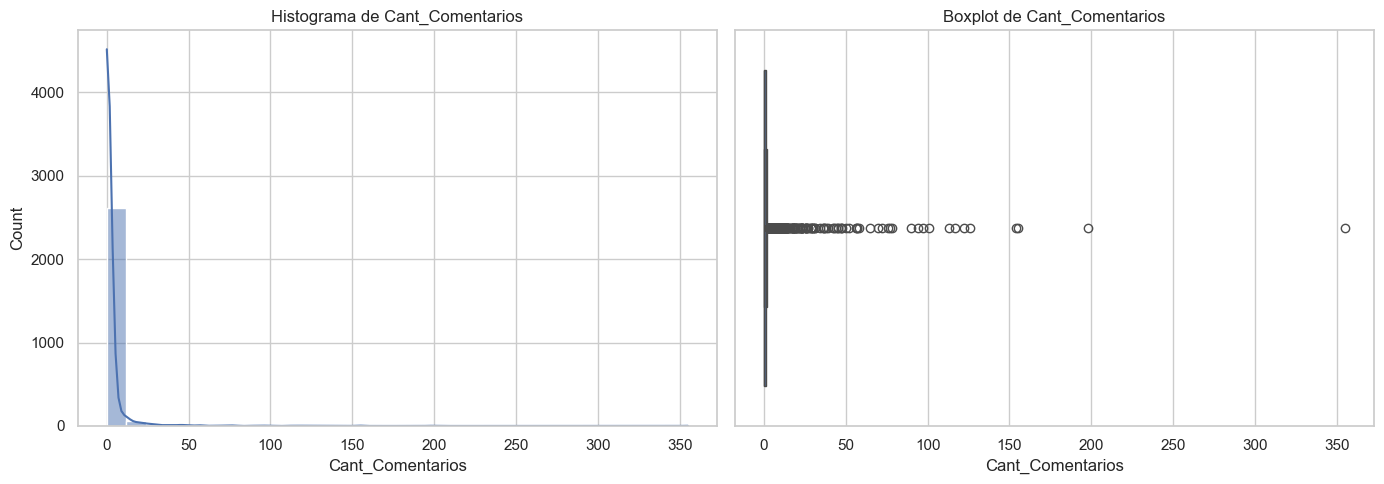

In [600]:
# Establecer estilo visual
sns.set(style="whitegrid")

# Lista de variables numéricas a analizar
variables_numericas = ['Cant_Vendidos', 'Calificacion', 'Precio_1', 'Calificaciones', 'Cant_Comentarios']

# Crear histogramas y boxplots para cada variable numérica
for var in variables_numericas:
    plt.figure(figsize=(14, 5))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    
    plt.tight_layout()
    plt.show()


In [601]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

### Variable Cant_Vendidos

In [602]:
# Distribución de Cant_Vendidos
Cant_Vendidos = df['Cant_Vendidos'].value_counts().sort_index(ascending=False)
print(Cant_Vendidos)

# Datos
data = df["Cant_Vendidos"].dropna()
bin_width = (data.max() - data.min()) / 30

# KDE (línea de densidad)
kde = gaussian_kde(data)
x_dens = np.linspace(data.min(), data.max(), 500)
y_dens = kde(x_dens) * len(data) * bin_width

# Histograma + KDE
fig_hist = go.Figure()

# Histograma
fig_hist.add_trace(go.Histogram(
    x=data,
    nbinsx=100,
    name='Histograma',
    opacity=0.6,
    marker_color='steelblue'
))

# Línea KDE
fig_hist.add_trace(go.Scatter(
    x=x_dens,
    y=y_dens,
    mode='lines',
    name='Distribución KDE',
    line=dict(color='Black', width=1)
))

fig_hist.update_layout(
    title="Distribución de Cantidad de Productos Vendidos",
    xaxis_title="Cant_Vendidos",
    yaxis_title="Frecuencia",
    bargap=0.05
)

fig_hist.show()

# Boxplot
fig_box = go.Figure()
fig_box.add_trace(go.Box(
    x=data,
    name="Boxplot Cant_Vendidos",
    boxpoints="outliers",
    marker_color='steelblue'
))

fig_box.update_layout(
    title="Boxplot de Cantidad de Productos Vendidos",
    xaxis_title="Cant_Vendidos"
)

fig_box.show()

Cant_Vendidos
1000     17
500      19
100     134
50      104
25      126
5       518
4       103
3       138
2       205
1       477
0       885
Name: count, dtype: int64


### Variable Precio_1

In [603]:
# Distribución de Precio_1

# Definir el rango de agrupación
rango = 50000

# Calcular el valor máximo para definir los bins
max_precio = df['Precio_1'].max()
bins = list(range(0, int(max_precio + rango), rango))

# Crear las etiquetas para los rangos
etiquetas = [f"${i:,} - ${i + rango - 1:,}" for i in bins[:-1]]

# Agrupar precios por rango
df['Rango_Precio_1'] = pd.cut(df['Precio_1'], bins=bins, labels=etiquetas, right=False)

# Calcular la frecuencia de cada rango
frecuencia_por_rango = df['Rango_Precio_1'].value_counts().sort_index(ascending=True)

# Mostrar el resultado
print(frecuencia_por_rango)


Rango_Precio_1
$0 - $49,999               843
$50,000 - $99,999          999
$100,000 - $149,999        552
$150,000 - $199,999        207
$200,000 - $249,999         57
$250,000 - $299,999         29
$300,000 - $349,999         14
$350,000 - $399,999         11
$400,000 - $449,999          1
$450,000 - $499,999          5
$500,000 - $549,999          0
$550,000 - $599,999          2
$600,000 - $649,999          0
$650,000 - $699,999          0
$700,000 - $749,999          2
$750,000 - $799,999          0
$800,000 - $849,999          0
$850,000 - $899,999          1
$900,000 - $949,999          1
$950,000 - $999,999          0
$1,000,000 - $1,049,999      0
$1,050,000 - $1,099,999      0
$1,100,000 - $1,149,999      2
Name: count, dtype: int64


In [604]:
# Datos de la variable Precio_1
data = df["Precio_1"].dropna()
bin_width = (data.max() - data.min()) / 30

# KDE (línea de densidad)
kde = gaussian_kde(data)
x_dens = np.linspace(data.min(), data.max(), 500)
y_dens = kde(x_dens) * len(data) * bin_width

# Histograma + KDE
fig_hist = go.Figure()

fig_hist.add_trace(go.Histogram(
    x=data,
    nbinsx=55,
    name='Histograma',
    opacity=0.6,
    marker_color='steelblue'
))

fig_hist.add_trace(go.Scatter(
    x=x_dens,
    y=y_dens,
    mode='lines',
    name='Distribución KDE',
    line=dict(color='black', width=1)
))

fig_hist.update_layout(
    title="Distribución de Precio Base (Precio_1)",
    xaxis_title="Precio_1",
    yaxis_title="Frecuencia",
    bargap=0.05
)

fig_hist.show()

# Boxplot
fig_box = go.Figure()
fig_box.add_trace(go.Box(
    x=data,
    name="Boxplot Precio_1",
    boxpoints="outliers",
    marker_color='steelblue'
))

fig_box.update_layout(
    title="Boxplot de Precio Base (Precio_1)",
    xaxis_title="Precio_1"
)

fig_box.show()

### Variable Calificacion

In [605]:
# Distribución de Calificacion
Calificacion = df['Calificacion'].value_counts().sort_index(ascending=False)
print(Calificacion)

# Preparar los datos
data = df["Calificacion"].dropna()
bin_width = (data.max() - data.min()) / 30

# KDE (línea de densidad)
kde = gaussian_kde(data)
x_dens = np.linspace(data.min(), data.max(), 500)
y_dens = kde(x_dens) * len(data) * bin_width

# Histograma + KDE
fig_hist = go.Figure()

fig_hist.add_trace(go.Histogram(
    x=data,
    nbinsx=30,
    name='Histograma',
    opacity=0.6,
    marker_color='steelblue'
))

fig_hist.add_trace(go.Scatter(
    x=x_dens,
    y=y_dens,
    mode='lines',
    name='Distribución KDE',
    line=dict(color='black', width=1)
))

fig_hist.update_layout(
    title="Distribución de Calificación Promedio",
    xaxis_title="Calificacion",
    yaxis_title="Frecuencia",
    bargap=0.05
)

fig_hist.show()

# Boxplot
fig_box = go.Figure()
fig_box.add_trace(go.Box(
    x=data,
    name="Boxplot Calificacion",
    boxpoints="outliers",
    marker_color='steelblue'
))

fig_box.update_layout(
    title="Boxplot de Calificación Promedio",
    xaxis_title="Calificacion"
)

fig_box.show()

Calificacion
5.0     557
4.9      68
4.8     111
4.7      84
4.6      50
4.5      68
4.4      19
4.3      24
4.2      14
4.1       3
4.0      64
3.9       2
3.8       8
3.7       3
3.6       2
3.4       1
3.3       5
3.2       1
3.0       5
2.9       1
2.4       1
2.3       2
1.8       1
0.0    1632
Name: count, dtype: int64


### Variable cantidad de comentarios.

In [606]:
# Distribución de Cant_Comentarios

# Definir el rango de agrupación
rango = 50

# Calcular el valor máximo
max_comentarios = df['Cant_Comentarios'].max()
bins = list(range(0, int(max_comentarios + rango), rango))

# Crear etiquetas legibles para los rangos
etiquetas = [f"{i} - {i + rango - 1}" for i in bins[:-1]]

# Agrupar por rangos
df['Rango_Cant_Comentarios'] = pd.cut(df['Cant_Comentarios'], bins=bins, labels=etiquetas, right=False)

# Calcular frecuencia por rango
frecuencia_rangos_comentarios = df['Rango_Cant_Comentarios'].value_counts().sort_index()

# Mostrar el resultado
print(frecuencia_rangos_comentarios)


Rango_Cant_Comentarios
0 - 49       2702
50 - 99        15
100 - 149       5
150 - 199       3
200 - 249       0
250 - 299       0
300 - 349       0
350 - 399       1
Name: count, dtype: int64


In [607]:
# Preparar los datos
data = df["Cant_Comentarios"].dropna()
bin_width = (data.max() - data.min()) / 30

# KDE (línea de densidad)
kde = gaussian_kde(data)
x_dens = np.linspace(data.min(), data.max(), 500)
y_dens = kde(x_dens) * len(data) * bin_width

# Histograma + KDE
fig_hist = go.Figure()

fig_hist.add_trace(go.Histogram(
    x=data,
    nbinsx=30,
    name='Histograma',
    opacity=0.6,
    marker_color='steelblue'
))

fig_hist.add_trace(go.Scatter(
    x=x_dens,
    y=y_dens,
    mode='lines',
    name='Distribución KDE',
    line=dict(color='black', width=1)
))

fig_hist.update_layout(
    title="Distribución de Cantidad de Comentarios por Producto",
    xaxis_title="Cant_Comentarios",
    yaxis_title="Frecuencia",
    bargap=0.05
)

fig_hist.show()

# Boxplot
fig_box = go.Figure()
fig_box.add_trace(go.Box(
    x=data,
    name="Boxplot Cant_Comentarios",
    boxpoints="outliers",
    marker_color='steelblue'
))

fig_box.update_layout(
    title="Boxplot de Cantidad de Comentarios",
    xaxis_title="Cant_Comentarios"
)

fig_box.show()

- La mayoría de los productos tiene 0 o muy pocos comentarios.
- Hay algunos productos con más de 100, incluso hasta mas de 300 comentarios, que son claramente outliers positivos.
- Estos productos con alta interacción pueden ser prioritarios para análisis de sentimiento.


### Variable cantidad de Calificaciones

In [608]:
# Definir el tamaño del rango
rango = 100

# Calcular el valor máximo
max_calificaciones = df['Calificaciones'].max()
bins = list(range(0, int(max_calificaciones + rango), rango))

# Crear etiquetas para los rangos
etiquetas = [f"{i} - {i + rango - 1}" for i in bins[:-1]]

# Agrupar por rangos
df['Rango_Calificaciones'] = pd.cut(df['Calificaciones'], bins=bins, labels=etiquetas, right=False)

# Calcular frecuencias por rango
frecuencia_rangos_calificaciones = df['Rango_Calificaciones'].value_counts().sort_index()

# Mostrar resultado
print(frecuencia_rangos_calificaciones)


Rango_Calificaciones
0 - 99       2697
100 - 199      14
200 - 299       9
300 - 399       2
400 - 499       2
500 - 599       1
600 - 699       0
700 - 799       0
800 - 899       0
900 - 999       1
Name: count, dtype: int64


In [609]:
# Preparar los datos
data = df["Calificaciones"].dropna()
bin_width = (data.max() - data.min()) / 30

# KDE (línea de densidad)
kde = gaussian_kde(data)
x_dens = np.linspace(data.min(), data.max(), 500)
y_dens = kde(x_dens) * len(data) * bin_width

# Histograma + KDE
fig_hist = go.Figure()

fig_hist.add_trace(go.Histogram(
    x=data,
    nbinsx=30,
    name='Histograma',
    opacity=0.6,
    marker_color='steelblue'
))

fig_hist.add_trace(go.Scatter(
    x=x_dens,
    y=y_dens,
    mode='lines',
    name='Distribución KDE',
    line=dict(color='black', width=1)
))

fig_hist.update_layout(
    title="Cantidad de Calificaciones",
    xaxis_title="Calificaciones",
    yaxis_title="Frecuencia",
    bargap=0.05
)

fig_hist.show()

# Boxplot
fig_box = go.Figure()
fig_box.add_trace(go.Box(
    x=data,
    name="Boxplot Calificaciones",
    boxpoints="outliers",
    marker_color='steelblue'
))

fig_box.update_layout(
    title="Cantidad de Calificaciones",
    xaxis_title="Calificaciones"
)

fig_box.show()

- Muchos productos con 0 calificaciones, es decir, no han sido valorados por usuarios aún.
- Hay productos con mas de 100 valoraciones, destacándose como productos populares o posicionados.

### Variable Reputacion_Vendedor

In [610]:
# Frecuencia de cada reputación
reputacion_freq = df['Reputacion_Vendedor'].value_counts(ascending=False)

print(reputacion_freq)


Reputacion_Vendedor
Sin reputacion           1766
MercadoLíder              466
MercadoLíder Platinum     295
MercadoLíder Gold         199
Name: count, dtype: int64


C:\Users\aluca\AppData\Local\Temp\ipykernel_10252\2623814160.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




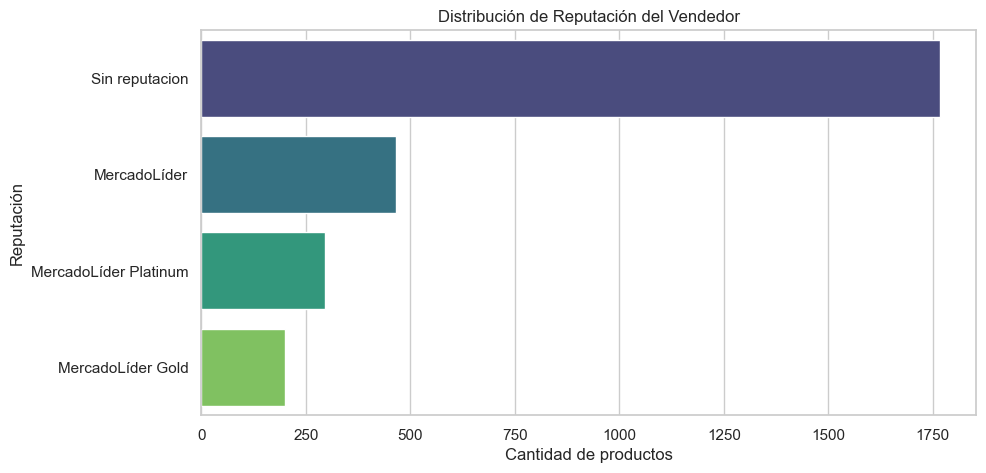

In [611]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Reputacion_Vendedor', order=reputacion_freq.index, palette='viridis')
plt.title("Distribución de Reputación del Vendedor")
plt.xlabel("Cantidad de productos")
plt.ylabel("Reputación")
plt.show()

### Por cantidad de publicaciones

In [612]:
# Top 20 vendedores con más productos
top_vendedores = df['Vendedor_1'].value_counts().head(20)
print(top_vendedores)


Vendedor_1
CREACIONES MAYI               112
CNLYNNTRISTAN-COR              92
Havaianas                      91
Bata                           62
CNNANJINGBIGBANGECOMMECOR      47
CNRUNPONEX-COR                 41
Croydon                        39
AMARE_PANTUFLAS                35
Agencia de Pantuflas           31
CNGANGZHOUXIMENGZEMAOYICOR     30
XAERTZ STORE                   30
ZAPATOS_BOGOTA                 28
CNANQINGXISHUZHANSHANGMCOR     27
MARIAIMPORTA                   27
ANVI 18                        27
CAMI.AMADO                     26
KARLA CHACON                   25
Agaval                         25
SHOP_DARYANA                   25
MARIACAMILASOTOFERNANDEZ       23
Name: count, dtype: int64


C:\Users\aluca\AppData\Local\Temp\ipykernel_10252\3199251106.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




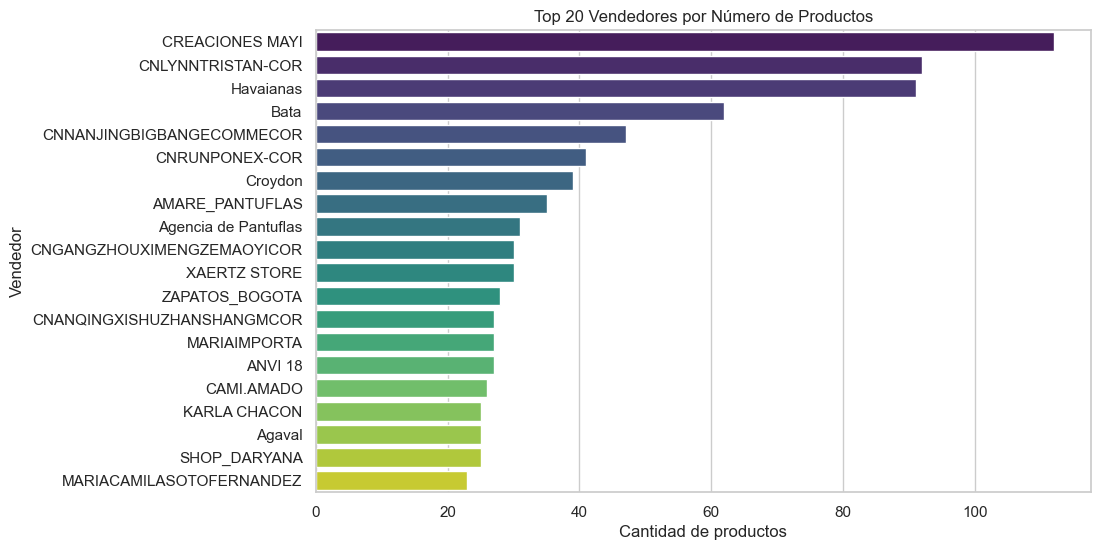

In [613]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette='viridis')
plt.title("Top 20 Vendedores por Número de Productos")
plt.xlabel("Cantidad de productos")
plt.ylabel("Vendedor")
plt.show()


### Por volumen de ventas

In [614]:
# Agrupar por vendedor y sumar cantidad vendida
ventas_por_vendedor = df.groupby('Vendedor_1')['Cant_Vendidos'].sum().sort_values(ascending=False)

# Mostrar top 20
top_ventas = ventas_por_vendedor.head(20)
print(top_ventas)

Vendedor_1
SERGIOJIME               3500
BOUN                     3400
AMARE_PANTUFLAS          3223
MULTIPLACECOLOMBIACOM    3100
JMBABUCHAS               2475
XAERTZ STORE             2357
Agencia de Pantuflas     2175
ROCHY 27                 1987
DORMILONJHON             1902
Havaianas                1779
LAMISCELANEATIENDA       1637
LABODEGA_SURTIDORA       1585
INVERSIONESBARUKSAS      1575
DESE211886               1525
TIENDA SHEKEL            1480
SHINA GROUP              1000
LOGISTICS SOLUTIONS      1000
VITTORIA One Shop         860
CREACIONES MAYI           766
ZAPATOS_BOGOTA            716
Name: Cant_Vendidos, dtype: int64


C:\Users\aluca\AppData\Local\Temp\ipykernel_10252\777649491.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




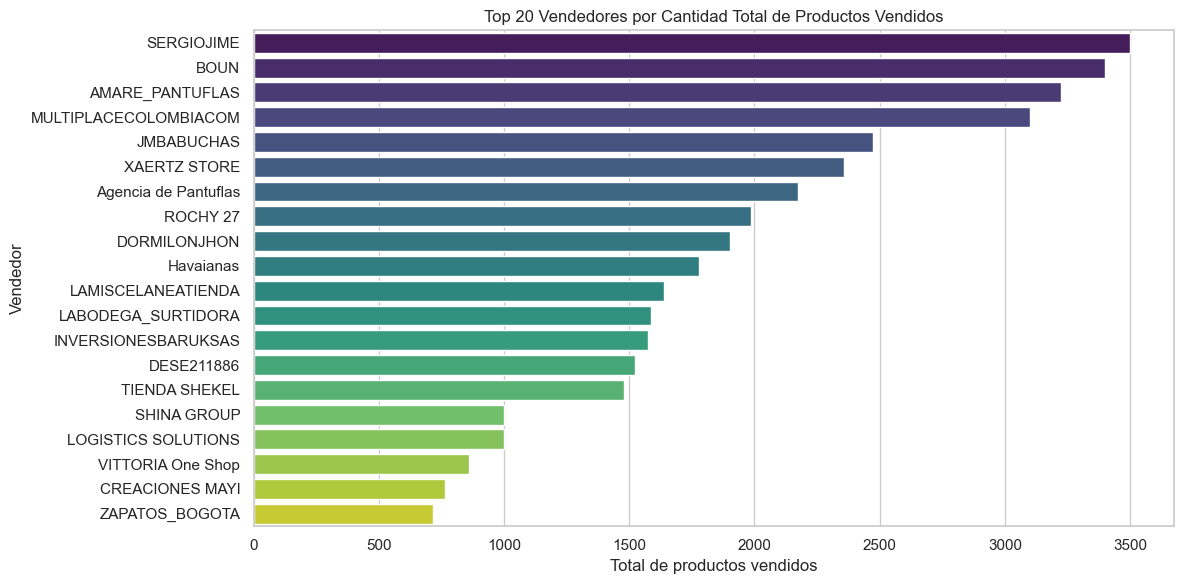

In [615]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_ventas.values, y=top_ventas.index, palette='viridis')
plt.title("Top 20 Vendedores por Cantidad Total de Productos Vendidos")
plt.xlabel("Total de productos vendidos")
plt.ylabel("Vendedor")
plt.tight_layout()
plt.show()


### Por cantidad de comentarios

In [616]:
# Agrupar por vendedor y sumar la cantidad total de comentarios
comentarios_por_vendedor = df.groupby('Vendedor_1')['Cant_Comentarios'].sum().sort_values(ascending=False)

# Mostrar top 20 vendedores con más comentarios
top_comentarios = comentarios_por_vendedor.head(20)
print(top_comentarios)

Vendedor_1
BOUN                     641
SERGIOJIME               446
JMBABUCHAS               377
AMARE_PANTUFLAS          358
DORMILONJHON             318
LAMISCELANEATIENDA       265
MULTIPLACECOLOMBIACOM    263
Agencia de Pantuflas     259
ROCHY 27                 245
XAERTZ STORE             218
LABODEGA_SURTIDORA       176
LOGISTICS SOLUTIONS      155
Havaianas                143
TIENDA SHEKEL            142
INVERSIONESBARUKSAS      118
ZAPATOS_BOGOTA           117
SHINA GROUP               94
DESE211886                93
CREACIONES MAYI           79
BOGOTOWN97                78
Name: Cant_Comentarios, dtype: int64


C:\Users\aluca\AppData\Local\Temp\ipykernel_10252\1907320980.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




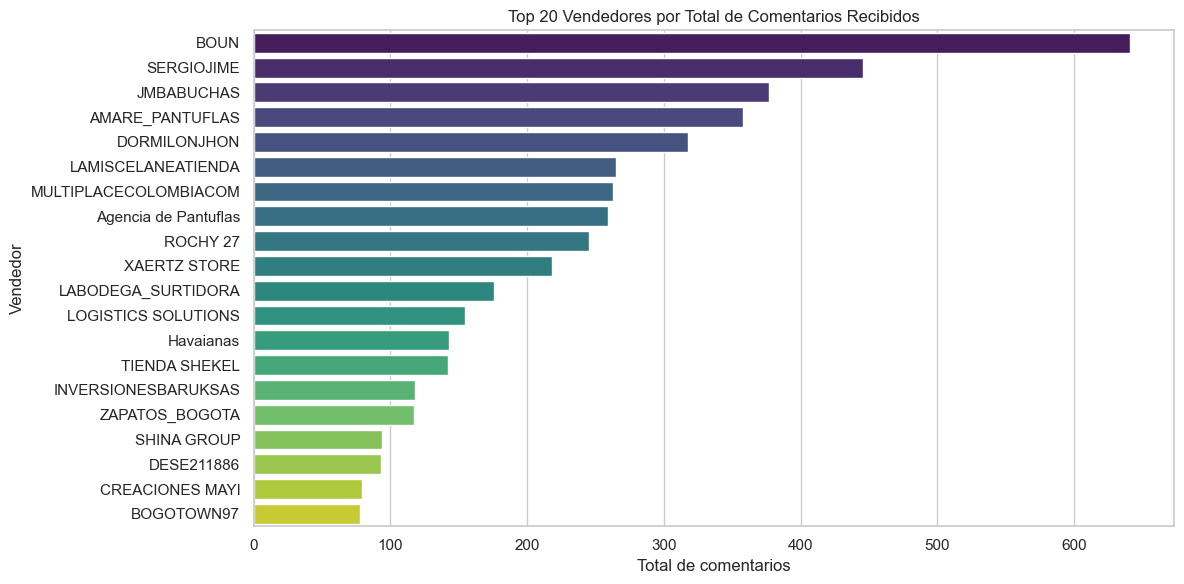

In [617]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_comentarios.values, y=top_comentarios.index, palette='viridis')
plt.title("Top 20 Vendedores por Total de Comentarios Recibidos")
plt.xlabel("Total de comentarios")
plt.ylabel("Vendedor")
plt.tight_layout()
plt.show()

### Por calificaciones.

In [618]:
# Agrupar por vendedor y sumar el total de calificaciones
calificaciones_por_vendedor = df.groupby('Vendedor_1')['Calificaciones'].sum().sort_values(ascending=False)

# Mostrar los top 20 vendedores con más calificaciones
top_calificaciones = calificaciones_por_vendedor.head(20)
print(top_calificaciones)

Vendedor_1
BOUN                     2094
SERGIOJIME               1077
MULTIPLACECOLOMBIACOM     856
XAERTZ STORE              702
AMARE_PANTUFLAS           684
JMBABUCHAS                650
LABODEGA_SURTIDORA        588
DORMILONJHON              561
Havaianas                 553
Agencia de Pantuflas      544
ROCHY 27                  525
LAMISCELANEATIENDA        482
INVERSIONESBARUKSAS       413
TIENDA SHEKEL             409
DESE211886                352
LOGISTICS SOLUTIONS       319
BOGOTOWN97                305
Adidas                    296
ZAPATOS_BOGOTA            280
SHINA GROUP               270
Name: Calificaciones, dtype: int64


C:\Users\aluca\AppData\Local\Temp\ipykernel_10252\3314363345.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




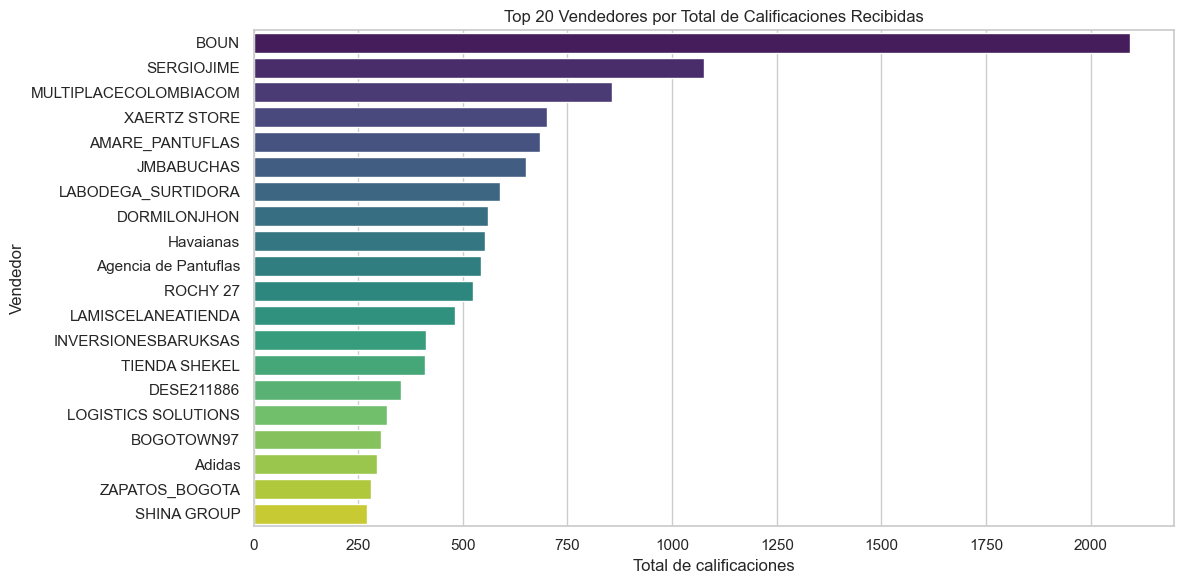

In [619]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_calificaciones.values, y=top_calificaciones.index, palette='viridis')
plt.title("Top 20 Vendedores por Total de Calificaciones Recibidas")
plt.xlabel("Total de calificaciones")
plt.ylabel("Vendedor")
plt.tight_layout()
plt.show()

### Por promedio calificaion

### Mirar que valor es mas significativo

In [620]:
# Agrupar y calcular el promedio de calificación
promedio_calificacion = df.groupby('Vendedor_1')['Calificacion'].mean().sort_values(ascending=False)

# Mostrar los 20 vendedores con mayor calificación promedio
top_prom_calificacion = promedio_calificacion.head(20)
print(top_prom_calificacion)

Vendedor_1
2CHECKOUTCO             5.0
MERCADO_LIDER2010       5.0
NIKE                    5.0
CNCHILE-COR             5.0
CNCAMELLCOR             5.0
NATURALMALLCO           5.0
MPAD_STORE              5.0
MORA8796189             5.0
UGOODCO                 5.0
UMALLCO1                5.0
CNXMWKWY-COR            5.0
CNYOUPAI-COR            5.0
CNYUMING1-COR           5.0
VAKUNO                  5.0
CNANOASIS-COR           5.0
MEGIELYCO               5.0
CNTENGHANGDA-COR        5.0
CRISMARSTYLE            5.0
CNADRIENNEVICTOR-COR    5.0
DANICACO1               5.0
Name: Calificacion, dtype: float64


In [621]:
# Filtrar vendedores con al menos 5 productos
conteo_productos = df.groupby('Vendedor_1').size()
vendedores_validos = conteo_productos[conteo_productos >= 5].index

# Aplicar el filtro antes de calcular el promedio
promedio_filtrado = df[df['Vendedor_1'].isin(vendedores_validos)].groupby('Vendedor_1')['Calificacion'].mean().sort_values(ascending=False).round(2)

# Mostrar top 20
print(promedio_filtrado.head(20))

Vendedor_1
STTRIKER                 4.80
JMBABUCHAS               4.79
TIENDA SHEKEL            4.79
Adidas                   4.76
RUNAPAK                  4.76
AYANTI.SHOPS             4.69
POTA7013563              4.66
BOUN                     4.60
INVERSIONESBARUKSAS      4.54
ZAPATOS_BOGOTA           4.49
MULTIPLACECOLOMBIACOM    4.48
TOED146450               4.48
Agencia de Pantuflas     4.45
MOOS4026166              4.38
FARSSI_LA_BARBA          4.36
DORMILONJHON             4.32
LAMISCELANEATIENDA       4.30
CALZADO CHAPULÍN         4.26
VITTORIA One Shop        4.26
RAOVIEDO25               4.26
Name: Calificacion, dtype: float64


C:\Users\aluca\AppData\Local\Temp\ipykernel_10252\2390556042.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




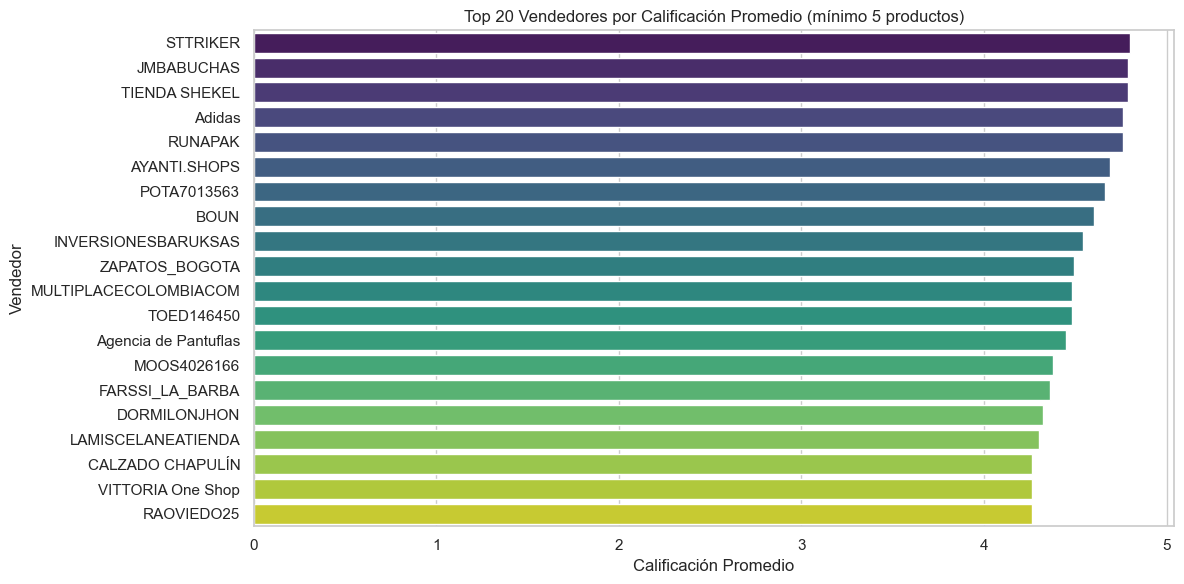

In [622]:
# Crear un gráfico de barras para los 20 vendedores con mayor calificación promedio
plt.figure(figsize=(12,6))
sns.barplot(x=promedio_filtrado.head(20).values, y=promedio_filtrado.head(20).index, palette='viridis')
plt.title("Top 20 Vendedores por Calificación Promedio (mínimo 5 productos)")
plt.xlabel("Calificación Promedio")
plt.ylabel("Vendedor")
plt.tight_layout()
plt.show()

## Importante analizar la variable detalle por sub conjuntos Todos los productos, Top productos por ventas, Top productos por comentarios

### TOTAL PRODUCTOS

In [623]:
# Copiar el DataFrame original para evitar modificarlo directamente
df_descripcion = df.copy()
df_descripcion

,Cant_Vendidos,Descripcion,Calificacion,Precio_1,Precio_2,Vendedor_1,Reputacion_Vendedor,Calificaciones,Cant_Comentarios,Url_Producto,Rango_Precio_1,Rango_Cant_Comentarios,Rango_Calificaciones
0,1000,Pantuflas Sandalias Chanclas Ligeras Ortopédic...,4.1,19999,49999,BOUN,MercadoLíder Platinum,996,355,https://articulo.mercadolibre.com.co/MCO-93366...,"$0 - $49,999",350 - 399,900 - 999
1,1000,Zapatos Acuaticos Agua Playa Hombre Mujer Pisc...,4.8,136500,0,SERGIOJIME,MercadoLíder Platinum,439,198,https://articulo.mercadolibre.com.co/MCO-86525...,"$100,000 - $149,999",150 - 199,400 - 499
2,1000,Zapato Playa Aqua Shoe Deportes Extremo Acuáticos,4.7,114399,129999,LOGISTICS SOLUTIONS,MercadoLíder,319,155,https://articulo.mercadolibre.com.co/MCO-56237...,"$100,000 - $149,999",150 - 199,300 - 399
3,1000,"Garras Colores Adulto Negra, Cafe, Gris",4.8,36900,0,JMBABUCHAS,Sin reputacion,296,154,https://articulo.mercadolibre.com.co/MCO-56866...,"$0 - $49,999",150 - 199,200 - 299
4,1000,Sandalias Chanclas Acolchadas Antideslizantes ...,4.6,19499,64999,BOUN,MercadoLíder Platinum,389,126,https://articulo.mercadolibre.com.co/MCO-93284...,"$0 - $49,999",100 - 149,300 - 399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,5,Babuchas Pantuflas Stitch Y Angela Térmicas,5.0,37000,0,XAERTZ STORE,MercadoLíder,1,0,https://articulo.mercadolibre.com.co/MCO-56463...,"$0 - $49,999",0 - 49,0 - 99
2722,5,Pantuflas Navideñas Del Grinch Esfera Árbol A...,5.0,34000,0,XAERTZ STORE,MercadoLíder,1,0,https://articulo.mercadolibre.com.co/MCO-13709...,"$0 - $49,999",0 - 49,0 - 99
2723,5,Pantuflas Bordadas Del Maravilloso Mundo De Ja...,5.0,34000,0,XAERTZ STORE,MercadoLíder,1,0,https://articulo.mercadolibre.com.co/MCO-14916...,"$0 - $49,999",0 - 49,0 - 99
2724,3,"Pantuflas De Garra De Gato, Pantuflas Peludas ...",5.0,33826,0,CNNINGBOBESTOFTHEBESTBACOR,MercadoLíder,1,0,https://articulo.mercadolibre.com.co/MCO-28112...,"$0 - $49,999",0 - 49,0 - 99


In [624]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

In [625]:
# Descargar stopwords si es la primera vez
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [626]:
# Lista de palabras adicionales a eliminar
palabras_excluir = {'original', 'producto', 'calidad'}

# Función de limpieza
def limpiar_texto(texto):
    # Pasar a minúsculas
    texto = texto.lower()
    # Quitar acentos
    texto = unicodedata.normalize('NFD', texto).encode('ascii', 'ignore').decode('utf-8')
    # Quitar caracteres especiales y dígitos
    texto = re.sub(r'[^a-z\s]', '', texto)
    # Tokenizar
    tokens = texto.split()
    # Eliminar stopwords y palabras personalizadas
    tokens = [palabra for palabra in tokens if palabra not in stop_words and palabra not in palabras_excluir]
    # Volver a unir
    return ' '.join(tokens)

In [627]:
# Aplicar limpieza
df_descripcion['Descripcion_Limpia'] = df_descripcion['Descripcion'].apply(limpiar_texto)

In [628]:
# Mostrar algunas descripciones limpias
df_descripcion[['Descripcion', 'Descripcion_Limpia']].sample(10)

,Descripcion,Descripcion_Limpia
1536,Zapatillas Mujer Peludos Orejas De Conejo Inte...,zapatillas mujer peludos orejas conejo interio...
871,Sandalia Deportiva Shibui Puma Para Hombre,sandalia deportiva shibui puma hombre
482,Priceshoes Sandalias Confort Mujeres 922sb400e...,priceshoes sandalias confort mujeres sbeazul
404,Sandalias Rider R1 Energy Hombre Negro,sandalias rider r energy hombre negro
726,Calzado Diabético Antideslizante Grueso Para H...,calzado diabetico antideslizante grueso hombre...
1812,Zapatos De Algodón Acolchados De Tacón Grueso ...,zapatos algodon acolchados tacon grueso calidos
535,Zapatos Antideslizantes Marca Evacol Ref 080 U...,zapatos antideslizantes marca evacol ref unisex
799,Diabéticas Zapatillas Zapatos Diabéticos Antib...,diabeticas zapatillas zapatos diabeticos antib...
2437,Pantufla Kuromi Suela Gruesa,pantufla kuromi suela gruesa
642,Chancla Sandalias Sharky Pantuflas Para Dama L...,chancla sandalias sharky pantuflas dama lumino...


In [629]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

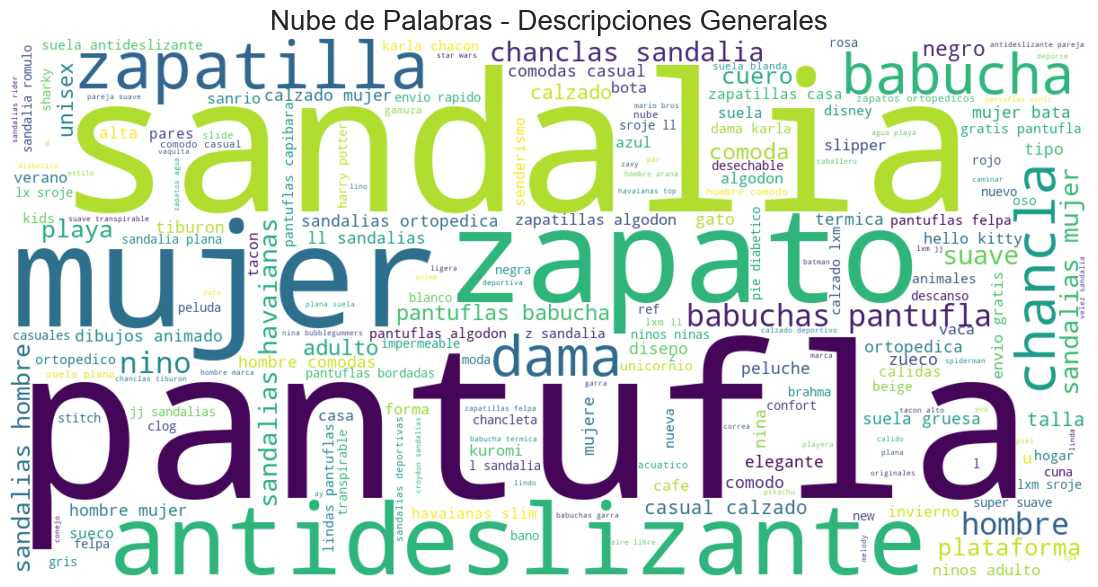

In [630]:
# Unir todas las descripciones limpias en un solo texto
texto_unido = ' '.join(df_descripcion['Descripcion_Limpia'])

# Generar la nube de palabras
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(texto_unido)

# Mostrar la nube de palabras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Descripciones Generales", fontsize=20)
plt.show()

In [631]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [632]:
# Filtrar descripciones no vacías
df_descripcion = df_descripcion[df_descripcion['Descripcion_Limpia'].str.strip().astype(bool)].copy()

# Función para generar n-gramas a nivel fila
def generar_ngrams(texto, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    try:
        X = vectorizer.fit_transform([texto])
        return vectorizer.get_feature_names_out()
    except ValueError:
        return []

In [633]:
# Aplicar generación de n-gramas
df_descripcion['bigrams'] = df_descripcion['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 1))
df_descripcion['trigrams'] = df_descripcion['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 2))
df_descripcion['cuatrigrams'] = df_descripcion['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 3))

# Funciones tipo las de tu ejemplo
def contar_palabras(df, columna='bigrams', top_n=20):
    bigramas = [b for fila in df[columna] for b in fila]
    return Counter(bigramas).most_common(top_n)

def contar_bigramas(df, columna='trigrams', top_n=20):
    trigramas = [t for fila in df[columna] for t in fila]
    return Counter(trigramas).most_common(top_n)

def contar_trigramas(df, columna='cuatrigrams', top_n=20):
    cuatrigramas = [c for fila in df[columna] for c in fila]
    return Counter(cuatrigramas).most_common(top_n)

# Calcular top 20
top_palabras = contar_palabras(df_descripcion, top_n=30)
top_bigramas = contar_bigramas(df_descripcion, top_n=20)
top_trigramas = contar_trigramas(df_descripcion, top_n=20)


In [634]:
# Mostrar resultados
top_palabras

[('sandalias', 857),
 ('pantuflas', 750),
 ('mujer', 637),
 ('zapatos', 359),
 ('hombre', 350),
 ('babuchas', 333),
 ('zapatillas', 295),
 ('sandalia', 261),
 ('chanclas', 242),
 ('calzado', 235),
 ('dama', 159),
 ('pantufla', 158),
 ('antideslizantes', 146),
 ('comodas', 144),
 ('ninos', 137),
 ('for', 132),
 ('suela', 125),
 ('antideslizante', 122),
 ('algodon', 104),
 ('havaianas', 104),
 ('playa', 103),
 ('casual', 103),
 ('ortopedicas', 87),
 ('suaves', 81),
 ('cuero', 81),
 ('unisex', 79),
 ('negro', 76),
 ('suave', 76),
 ('plataforma', 73),
 ('tiburon', 66)]

In [635]:
top_bigramas

[('babuchas pantuflas', 142),
 ('chanclas sandalias', 103),
 ('sandalias havaianas', 93),
 ('sandalias mujer', 93),
 ('sandalias hombre', 84),
 ('pantuflas babuchas', 64),
 ('for mujer', 57),
 ('casual calzado', 57),
 ('sandalias ortopedicas', 52),
 ('hombre comodas', 51),
 ('suela gruesa', 46),
 ('hombre mujer', 45),
 ('comodas casual', 42),
 ('mujer bata', 41),
 ('calzado mujer', 39),
 ('dibujos animados', 39),
 ('pantufla babucha', 38),
 ('ll sandalias', 38),
 ('sandalias chanclas', 34),
 ('hello kitty', 32)]

In [636]:
top_trigramas

[('chanclas sandalias havaianas', 90),
 ('sandalias hombre comodas', 48),
 ('comodas casual calzado', 42),
 ('hombre comodas casual', 42),
 ('sandalias mujer bata', 41),
 ('ll sandalias hombre', 38),
 ('sandalias havaianas slim', 24),
 ('dama karla chacon', 22),
 ('jj sandalias hombre', 21),
 ('sroje ll sandalias', 20),
 ('mujer casual sandalia', 17),
 ('sandalia dama karla', 17),
 ('lxm ll sandalias', 16),
 ('calzado mujer casual', 16),
 ('casual sandalia dama', 16),
 ('comodo casual calzado', 15),
 ('hombre comodo casual', 15),
 ('sandalias hombre comodo', 15),
 ('antideslizante pareja suave', 15),
 ('calzado antideslizante pareja', 15)]

### Sub conjunto por ventas y comentarios

In [637]:
# Lista de palabras adicionales a eliminar
palabras_excluir = {'original', 'producto', 'calidad'}

# Función de limpieza
def limpiar_texto(texto):
    # Pasar a minúsculas
    texto = texto.lower()
    # Quitar acentos
    texto = unicodedata.normalize('NFD', texto).encode('ascii', 'ignore').decode('utf-8')
    # Quitar caracteres especiales y dígitos
    texto = re.sub(r'[^a-z\s]', '', texto)
    # Tokenizar
    tokens = texto.split()
    # Eliminar stopwords y palabras personalizadas
    tokens = [palabra for palabra in tokens if palabra not in stop_words and palabra not in palabras_excluir]
    # Volver a unir
    return ' '.join(tokens)

In [638]:
# Productos con más de 100 ventas
df_top_ventas = df[df['Cant_Vendidos'] >= 100].copy()

# Productos con más de 50 comentarios
df_top_comentarios = df[df['Cant_Comentarios'] >= 10].copy()

In [639]:
# aplicar limpieza a las descripciones en el dataframe filtrado
df_top_ventas['Descripcion_Limpia'] = df_top_ventas['Descripcion'].apply(limpiar_texto)

df_top_comentarios['Descripcion_Limpia'] = df_top_comentarios['Descripcion'].apply(limpiar_texto)

In [640]:
# Generar n-gramas para los dataframes filtrados
df_top_ventas['palabras'] = df_top_ventas['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 1))
df_top_ventas['bigrams'] = df_top_ventas['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 2))
df_top_ventas['trigrams'] = df_top_ventas['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 3))

df_top_comentarios['palabras'] = df_top_comentarios['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 1))
df_top_comentarios['bigrams'] = df_top_comentarios['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 2))
df_top_comentarios['trigrams'] = df_top_comentarios['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 3))


In [641]:
# Palabras, Bigramas y trigramas para top ventas
top_palabras_ventas = contar_palabras(df_top_ventas, 'palabras', 20)
top_bigramas_ventas = contar_bigramas(df_top_ventas, 'bigrams', 20)
top_trigramas_ventas = contar_trigramas(df_top_ventas, 'trigrams', 20)

# Palabras,Bigramas y trigramas para top comentarios
top_palabras_coment = contar_palabras(df_top_comentarios, 'palabras', 20)
top_bigramas_coment = contar_bigramas(df_top_comentarios, 'bigrams', 20)
top_trigramas_coment = contar_trigramas(df_top_comentarios, 'trigrams', 20)


In [642]:
# Mostrar resultados
print("Top 30 palabras en productos con más de n ventas:")
for palabra, frecuencia in top_palabras_ventas:
    print(f"{palabra}: {frecuencia}")

Top 30 palabras en productos con más de n ventas:
pantuflas: 75
babuchas: 56
sandalias: 33
mujer: 31
hombre: 30
chanclas: 29
zapatos: 27
antideslizantes: 20
antideslizante: 17
unisex: 16
pantufla: 16
dama: 15
ninos: 13
comodas: 12
babucha: 12
sandalia: 11
alta: 11
termica: 10
adultos: 10
suaves: 9


In [643]:
print("\nTop 20 bigramas en productos con más de n ventas:")
for bigrama, frecuencia in top_bigramas_ventas:
    print(f"{bigrama}: {frecuencia}")


Top 20 bigramas en productos con más de n ventas:
babuchas pantuflas: 29
hombre mujer: 15
sandalias chanclas: 11
pantufla babucha: 11
pantuflas babuchas: 9
ninos adultos: 9
chanclas sandalias: 7
agua playa: 6
pantuflas bordadas: 6
sandalias havaianas: 6
chanclas ligeras: 5
babuchas dama: 5
evacol ref: 5
marca evacol: 5
zapatos antideslizantes: 5
chanclas adilette: 5
suela antideslizante: 5
pantuflas sandalias: 4
alta diseno: 4
dama alta: 4


In [644]:
print("\nTop 20 trigramas en productos con más de n ventas:")
for trigram, frecuencia in top_trigramas_ventas:
    print(f"{trigram}: {frecuencia}")


Top 20 trigramas en productos con más de n ventas:
chanclas sandalias havaianas: 6
sandalias chanclas ligeras: 5
pantuflas babuchas dama: 5
pantuflas sandalias chanclas: 4
babuchas dama alta: 4
dama alta diseno: 4
pantufla babucha termica: 4
chanclas ligeras ortopedica: 3
ligeras ortopedica suaves: 3
agua playa deportes: 3
sandalia agua playa: 3
zapatos sandalia agua: 3
comodas hombre mujer: 3
marca evacol ref: 3
suecos zapatos chancla: 3
sandalias havaianas top: 3
antideslizantes marca evacol: 3
zapatos antideslizantes marca: 3
chanclas adilette shower: 3
ortopedica suaves nube: 2


In [645]:
print("\nTop 30 palabras en productos con más de n comentarios:")
for palabra, frecuencia in top_palabras_coment:
    print(f"{palabra}: {frecuencia}")


Top 30 palabras en productos con más de n comentarios:
pantuflas: 63
babuchas: 52
hombre: 28
sandalias: 26
mujer: 26
chanclas: 18
zapatos: 18
antideslizantes: 16
unisex: 13
comodas: 13
pantufla: 13
babucha: 12
antideslizante: 12
dama: 11
ninos: 10
playa: 9
alta: 9
agua: 8
sandalia: 8
suela: 8


In [646]:
print("\nTop 20 bigramas en productos con más de n comentarios:")
for bigrama, frecuencia in top_bigramas_coment:
    print(f"{bigrama}: {frecuencia}")


Top 20 bigramas en productos con más de n comentarios:
babuchas pantuflas: 27
hombre mujer: 14
pantufla babucha: 10
sandalias chanclas: 9
pantuflas babuchas: 7
ninos adultos: 7
agua playa: 6
suela antideslizante: 5
chanclas ligeras: 4
babuchas dama: 4
pantuflas sandalias: 3
playa piscina: 3
zapatos agua: 3
alta diseno: 3
dama alta: 3
playa deportes: 3
sandalia agua: 3
zapatos sandalia: 3
babucha termica: 3
comodas hombre: 3


In [647]:
print("\nTop 20 trigramas en productos con más de n comentarios:")
for trigram, frecuencia in top_trigramas_coment:
    print(f"{trigram}: {frecuencia}")


Top 20 trigramas en productos con más de n comentarios:
sandalias chanclas ligeras: 4
pantuflas babuchas dama: 4
pantuflas sandalias chanclas: 3
babuchas dama alta: 3
dama alta diseno: 3
agua playa deportes: 3
sandalia agua playa: 3
zapatos sandalia agua: 3
pantufla babucha termica: 3
comodas hombre mujer: 3
chanclas ligeras ortopedica: 2
ligeras ortopedica suaves: 2
playa hombre mujer: 2
chanclas ultra comodas: 2
ligeras ortopedicas chanclas: 2
ortopedicas chanclas ultra: 2
sandalias ligeras ortopedicas: 2
agua playa piscina: 2
hombre mujer suela: 2
mujer suela caucho: 2


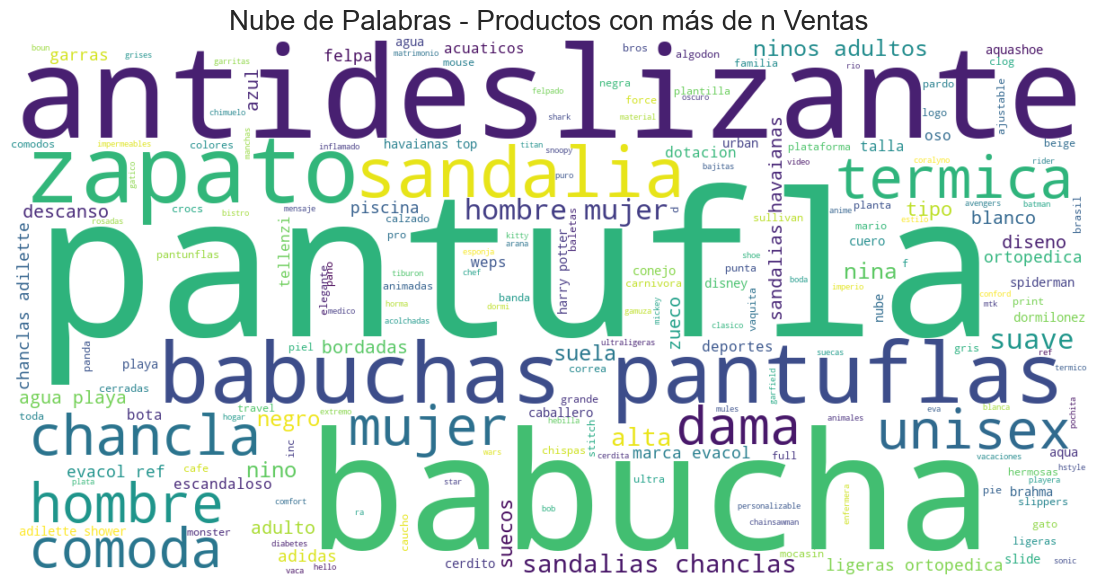

In [648]:
# Nube de palabras para productos con más de 100 ventas
texto_ventas = ' '.join(df_top_ventas['Descripcion_Limpia'])
wordcloud_ventas = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(texto_ventas)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_ventas, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Productos con más de n Ventas", fontsize=20)
plt.show()

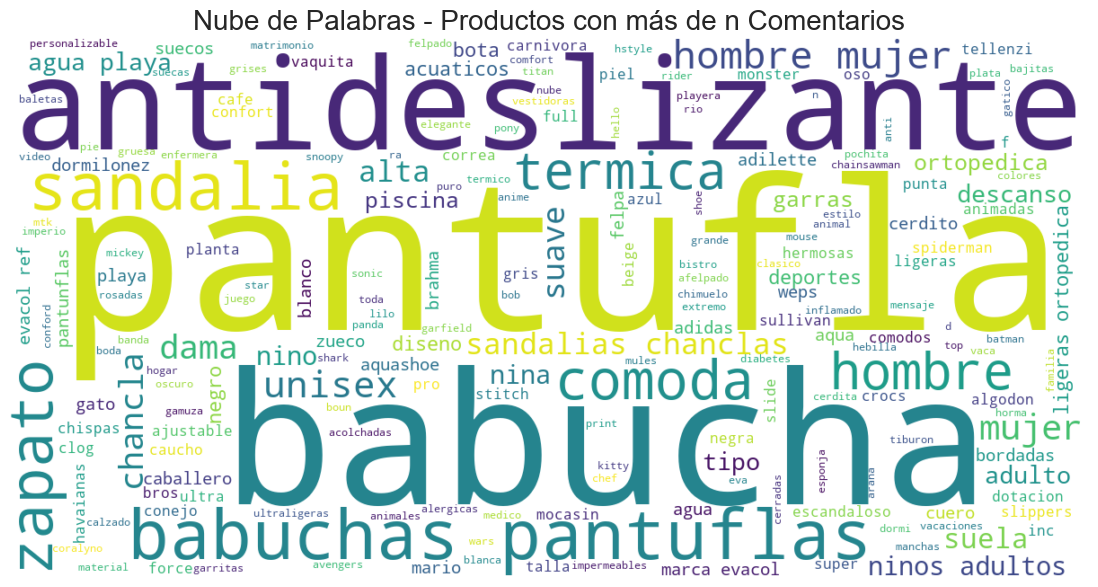

In [649]:
# Nube de palabras para productos con más de 20 comentarios
texto_comentarios = ' '.join(df_top_comentarios['Descripcion_Limpia'])
wordcloud_comentarios = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(texto_comentarios)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_comentarios, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Productos con más de n Comentarios", fontsize=20)
plt.show()